<a href="https://colab.research.google.com/github/Hablna/Machine_Learning/blob/main/MachineLeaning/TP1_classification_champignons.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Machine Learning TP1 : Reconnaissance de Champignon

### Import des librairies

In [5]:
import pandas as pd
import numpy as np
import os
from IPython.display import Image, display

from sklearn import preprocessing

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn import ensemble
from sklearn.tree import export_graphviz
# pd.set_option('display.max_rows', None) # Afficher toutes les lignes des dataframes
# pd.set_option('display.max_columns', None) # Afficher toutes les lignes des dataframes

### 1. Preparation des données

1.1 importer et afficher les données dans un DataFrame.

Afficher le nombre de champignons toxiques ou non.

Vérifier qu'il n'y as pas de valeurs nulles

In [6]:
df = pd.read_csv('/content/sample_data/champignons.csv')

df

,toxicite,surface-chapeau,ecchymoses,attache-lamelles,taille-lamelles,forme-pied,surface-pied-sur-anneau,couleur-pied-sur-anneau,couleur-voile,type-anneau,population
0,toxique,lisse,oui,libre,étroit,élargissant,lisse,blanc,blanc,pendant,dispersée
1,comestible,lisse,oui,libre,large,élargissant,lisse,blanc,blanc,pendant,nombreuse
2,comestible,lisse,oui,libre,large,élargissant,lisse,blanc,blanc,pendant,nombreuse
3,toxique,écaillée,oui,libre,étroit,élargissant,lisse,blanc,blanc,pendant,dispersée
4,comestible,lisse,non,libre,large,effilé,lisse,blanc,blanc,évasé,abondante
...,...,...,...,...,...,...,...,...,...,...,...
8119,comestible,lisse,non,adhérent,large,élargissant,lisse,orange,orange,pendant,clairsemée
8120,comestible,lisse,non,adhérent,large,élargissant,lisse,orange,brun,pendant,variée
8121,comestible,lisse,non,adhérent,large,élargissant,lisse,orange,orange,pendant,clairsemée
8122,toxique,écaillée,non,libre,étroit,effilé,lisse,blanc,blanc,évasé,variée


In [ ]:

print("Nombre des champignons toxiques et non toxiques:")
print(df['toxicite'].value_counts())

# Check for null values
print("\nLes valeurs nulles:")
print(df.isnull().sum())

Nombre des champignons toxiques et non toxiques:
toxicite
comestible    4208
toxique       3916
Name: count, dtype: int64

Checking for null values:
toxicite                   0
surface-chapeau            0
ecchymoses                 0
attache-lamelles           0
taille-lamelles            0
forme-pied                 0
surface-pied-sur-anneau    0
couleur-pied-sur-anneau    0
couleur-voile              0
type-anneau                0
population                 0
dtype: int64


1.2 Encoder les données avec une colonne 1/0 par valeur possible.Eviter de générer une matrice "sparse"\
Afficher la taille des données (lignes x colonnes) et les noms de colonnes générées.\
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html#sklearn.preprocessing.OneHotEncoder

In [11]:
encoder = preprocessing.OneHotEncoder(sparse_output=False, dtype=int) # sparse output évite de renvoyer une matrice de base et non "sparse". Génération de valeurs entières
encoder.fit(df) # Accepte le dataframe pandas, pas besoin de Numpy. Utilise fit, même si ce n'est pas vraiment un modèled.
valeurs_encode = encoder.transform(df)
feature_names = encoder.get_feature_names_out()

print("Taille des données encodées (lignes x colonnes):", valeurs_encode.shape)
print("\nNoms de colonnes générées:")
print(feature_names)

Taille des données encodées (lignes x colonnes): (8124, 42)

Noms de colonnes générées:
['toxicite_comestible' 'toxicite_toxique' 'surface-chapeau_fibreuse'
 'surface-chapeau_lisse' 'surface-chapeau_rainurée'
 'surface-chapeau_écaillée' 'ecchymoses_non' 'ecchymoses_oui'
 'attache-lamelles_adhérent' 'attache-lamelles_libre'
 'taille-lamelles_large' 'taille-lamelles_étroit' 'forme-pied_effilé'
 'forme-pied_élargissant' 'surface-pied-sur-anneau_fibreuse'
 'surface-pied-sur-anneau_lisse' 'surface-pied-sur-anneau_soyeuse'
 'surface-pied-sur-anneau_écaillée' 'couleur-pied-sur-anneau_beige'
 'couleur-pied-sur-anneau_blanc' 'couleur-pied-sur-anneau_brun'
 'couleur-pied-sur-anneau_cannelle' 'couleur-pied-sur-anneau_gris'
 'couleur-pied-sur-anneau_jaune' 'couleur-pied-sur-anneau_orange'
 'couleur-pied-sur-anneau_rose' 'couleur-pied-sur-anneau_rouge'
 'couleur-voile_blanc' 'couleur-voile_brun' 'couleur-voile_jaune'
 'couleur-voile_orange' 'type-anneau_aucun' 'type-anneau_fibreux'
 'type-anneau_la

1.3 Créer un nouveau DataFrame avec les données et les noms de colonne (méthode get_feature_names_out() de OneHotEncoder). Mélanger les données. Afficher le résultat.

In [12]:
new_df = pd.DataFrame(valeurs_encode, columns=feature_names)
new_df

,toxicite_comestible,toxicite_toxique,surface-chapeau_fibreuse,surface-chapeau_lisse,surface-chapeau_rainurée,surface-chapeau_écaillée,ecchymoses_non,ecchymoses_oui,attache-lamelles_adhérent,attache-lamelles_libre,...,type-anneau_fibreux,type-anneau_large,type-anneau_pendant,type-anneau_évasé,population_abondante,population_clairsemée,population_dispersée,population_nombreuse,population_solitaire,population_variée
0,0,1,0,1,0,0,0,1,0,1,...,0,0,1,0,0,0,1,0,0,0
1,1,0,0,1,0,0,0,1,0,1,...,0,0,1,0,0,0,0,1,0,0
2,1,0,0,1,0,0,0,1,0,1,...,0,0,1,0,0,0,0,1,0,0
3,0,1,0,0,0,1,0,1,0,1,...,0,0,1,0,0,0,1,0,0,0
4,1,0,0,1,0,0,1,0,0,1,...,0,0,0,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,1,0,0,1,0,0,1,0,1,0,...,0,0,1,0,0,1,0,0,0,0
8120,1,0,0,1,0,0,1,0,1,0,...,0,0,1,0,0,0,0,0,0,1
8121,1,0,0,1,0,0,1,0,1,0,...,0,0,1,0,0,1,0,0,0,0
8122,0,1,0,0,0,1,1,0,0,1,...,0,0,0,1,0,0,0,0,0,1


1.4 Creer 4 jeux de données : train features et labels (70%) et dev features et labels (30%).\
Utiliser toxicite_toxique comme label. Ne pas garder de label (toxicite_toxique et toxicite_comestible) dans les features !

In [13]:
# Les features et labels
# j'enlève les colonnes de toxicité
X = new_df.drop(columns=['toxicite_toxique', 'toxicite_comestible'])
y = new_df['toxicite_toxique']

X_train, X_dev, y_train, y_dev = train_test_split(X, y, test_size=0.3, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_dev:", X_dev.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_dev:", y_dev.shape)

Shape of X_train: (5686, 40)
Shape of X_dev: (2438, 40)
Shape of y_train: (5686,)
Shape of y_dev: (2438,)


## 2. Arbre de décision

2.1 Entrainer un arbre de décision sur les données d'apprentissage. Afficher l'arbre obtenu en utilisant plot_tree.

[Text(0.7012195121951219, 0.95, 'surface-pied-sur-anneau_soyeuse <= 0.5\ngini = 0.499\nsamples = 5686\nvalue = [2951, 2735]\nclass = comestible'),
 Text(0.5, 0.85, 'taille-lamelles_étroit <= 0.5\ngini = 0.411\nsamples = 4018\nvalue = [2857, 1161]\nclass = comestible'),
 Text(0.600609756097561, 0.8999999999999999, 'True  '),
 Text(0.24390243902439024, 0.75, 'surface-chapeau_lisse <= 0.5\ngini = 0.157\nsamples = 2915\nvalue = [2664, 251]\nclass = comestible'),
 Text(0.0975609756097561, 0.65, 'forme-pied_élargissant <= 0.5\ngini = 0.025\nsamples = 1962\nvalue = [1937, 25]\nclass = comestible'),
 Text(0.04878048780487805, 0.55, 'gini = 0.0\nsamples = 1500\nvalue = [1500, 0]\nclass = comestible'),
 Text(0.14634146341463414, 0.55, 'population_variée <= 0.5\ngini = 0.102\nsamples = 462\nvalue = [437, 25]\nclass = comestible'),
 Text(0.0975609756097561, 0.45, 'gini = 0.0\nsamples = 430\nvalue = [430, 0]\nclass = comestible'),
 Text(0.1951219512195122, 0.45, 'gini = 0.342\nsamples = 32\nvalue =

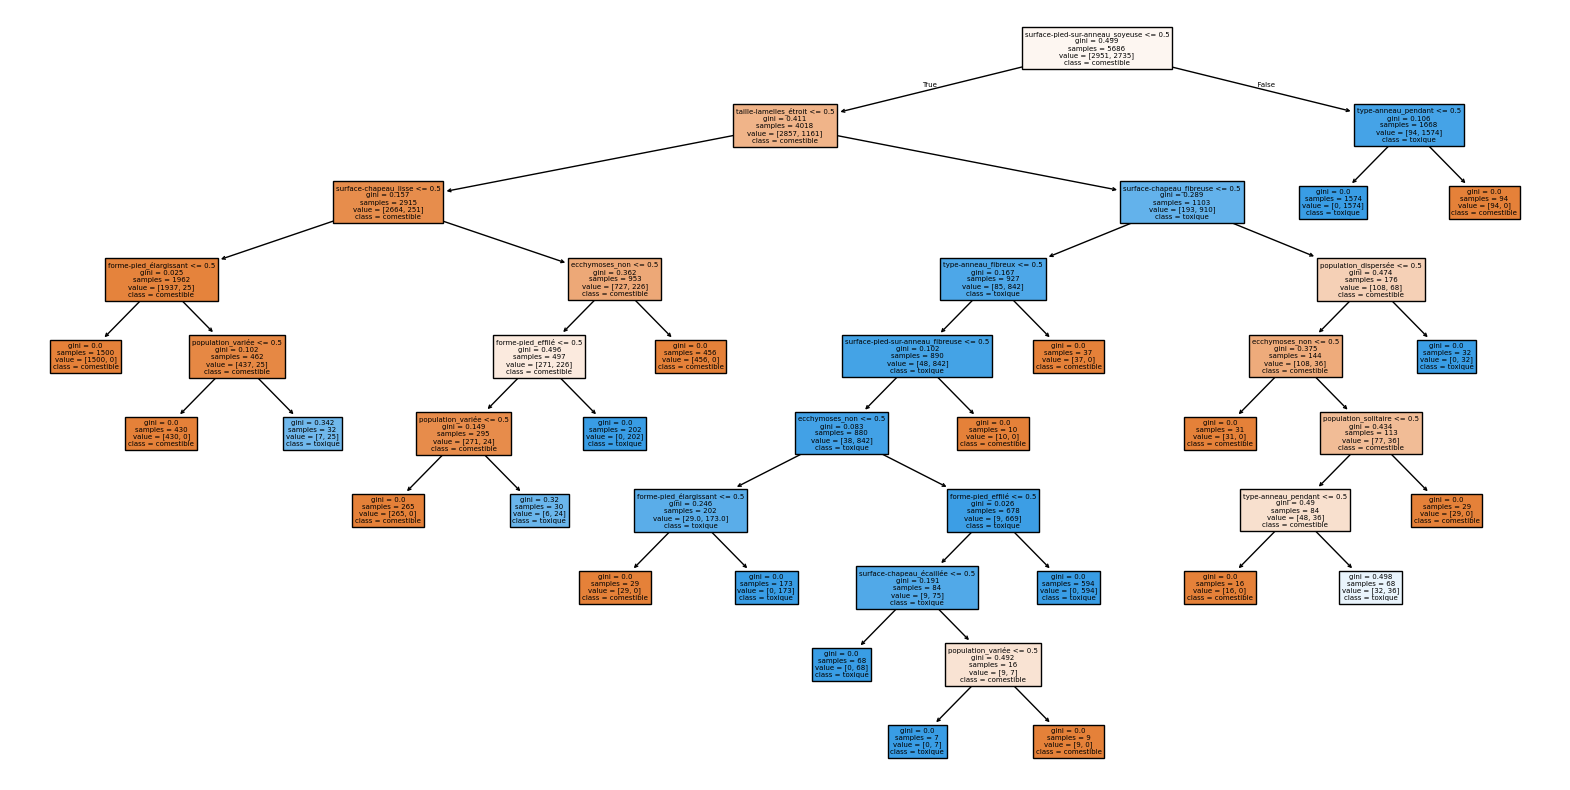

In [20]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Train a Decision Tree Classifier
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)

# Plot the decision tree
plt.figure(figsize=(20,10))
plot_tree(decision_tree, feature_names=X_train.columns, filled=True, class_names=['comestible', 'toxique'])

2.2 Afficher l'arbre obtenu en utilisant graphwiz

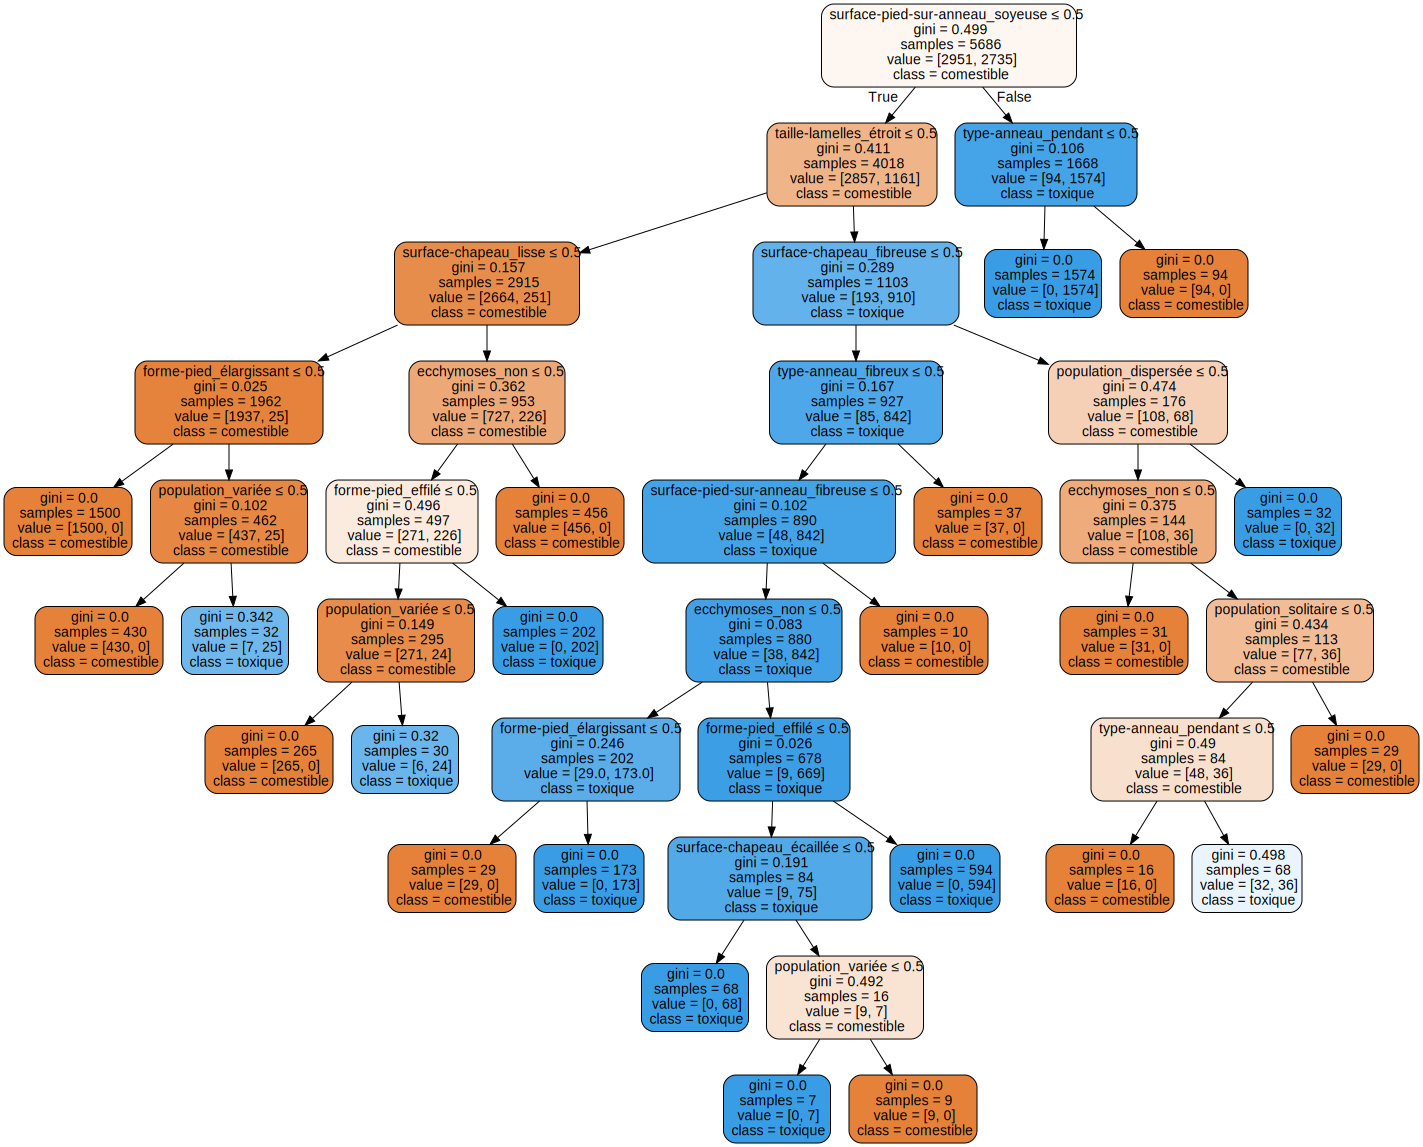

In [21]:
from sklearn.tree import export_graphviz
from IPython.display import Image, display
import graphviz

# Export the decision tree to Graphviz format
dot_data = export_graphviz(decision_tree,
                           feature_names=X_train.columns,
                           class_names=['comestible', 'toxique'],
                           filled=True, rounded=True,
                           special_characters=True)

# Create a Graphviz object from the dot data
graph = graphviz.Source(dot_data)

# Display the graph
display(graph)

2.3 Mesurer la précision du modèle sur les données de dev

## 3. Modèle de forêt

3.1 Réalisez un algorithme de Random Forest sur les données. Utiliser 500 arbres et une profondeur de 6.

3.2 Afficher trois arbres au hasard.

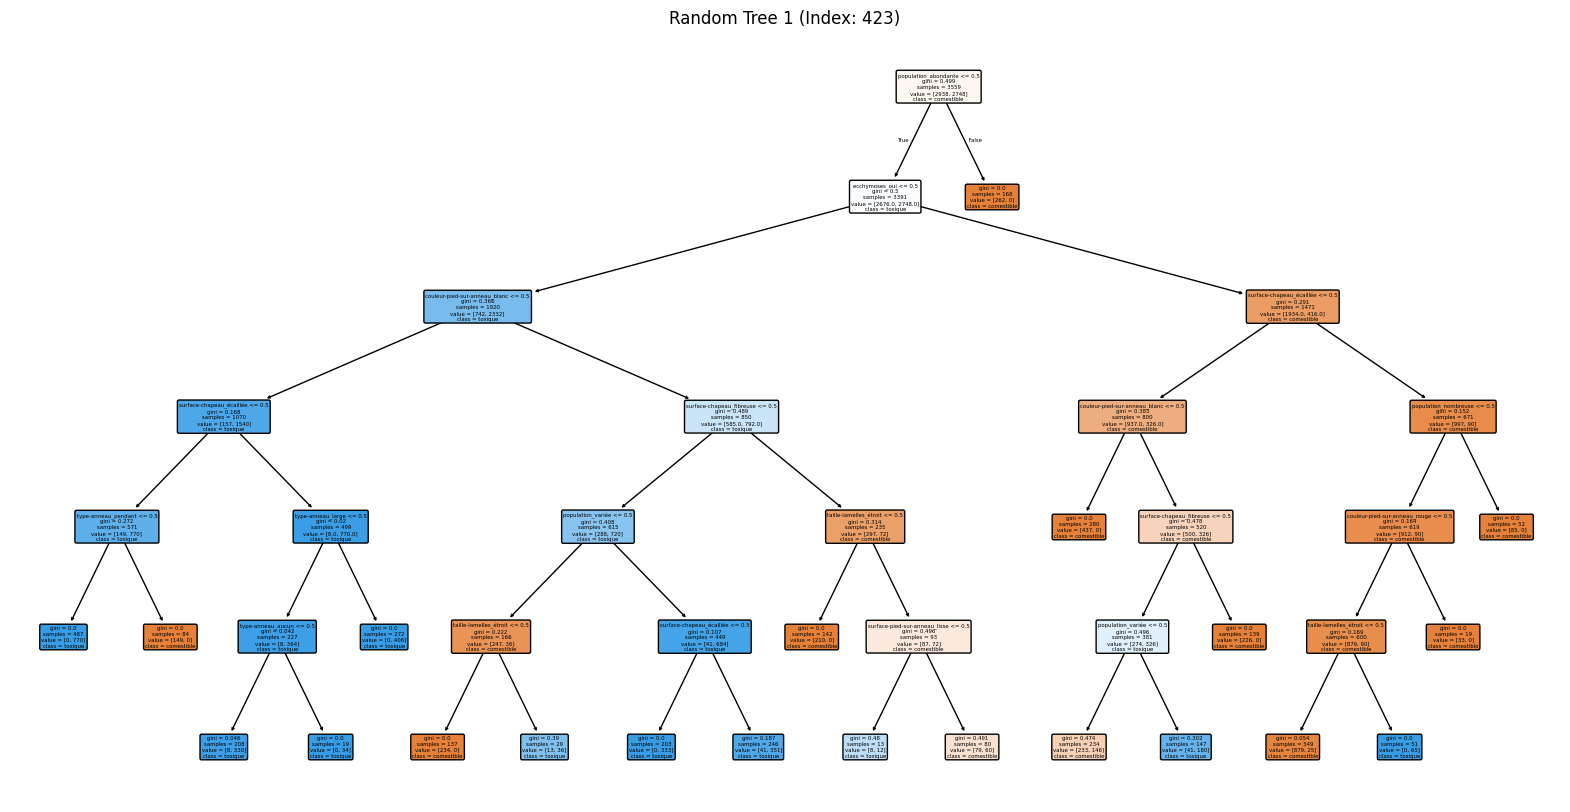

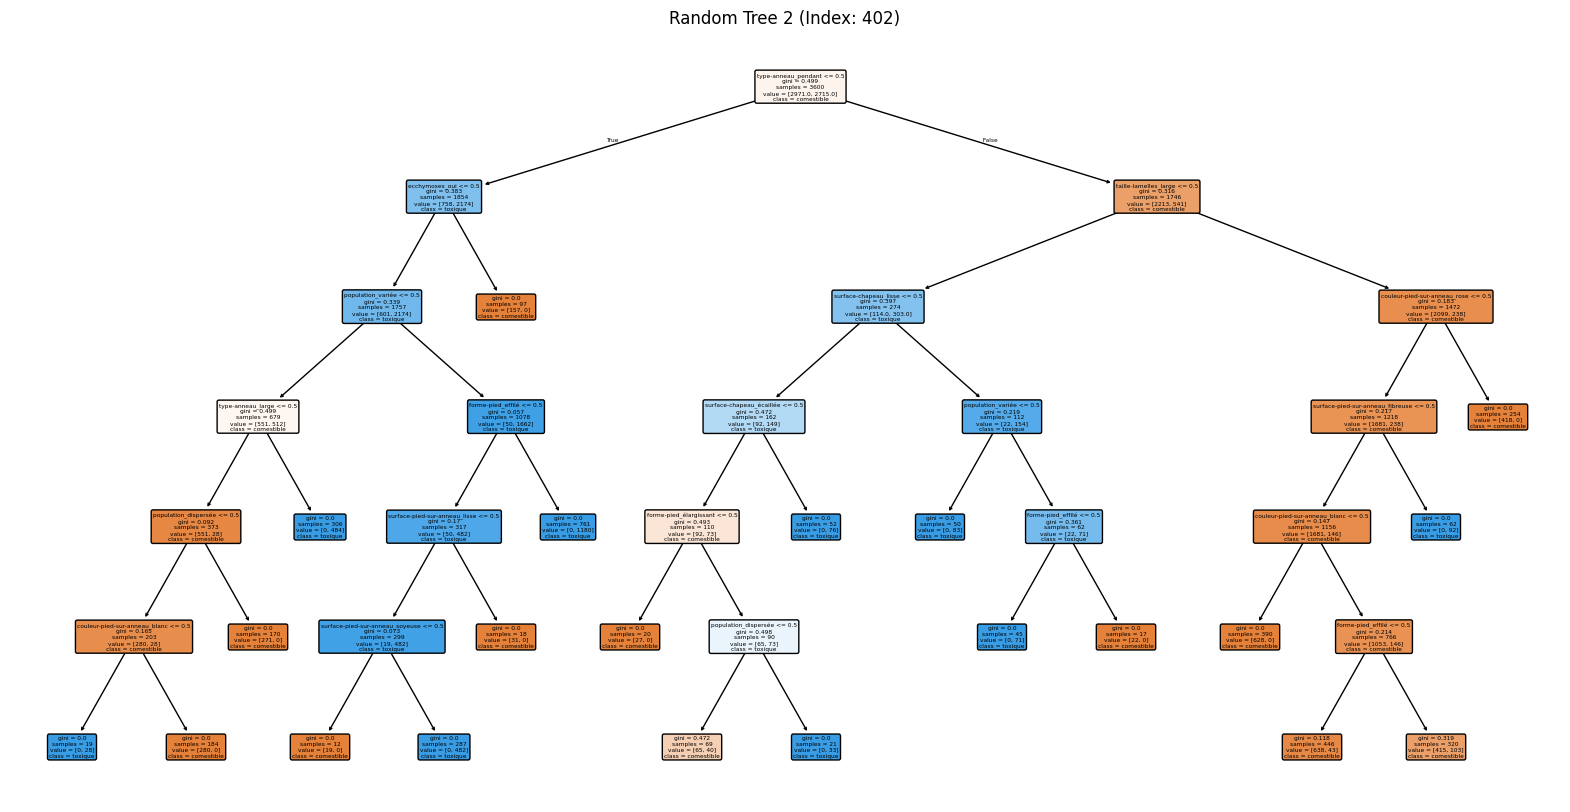

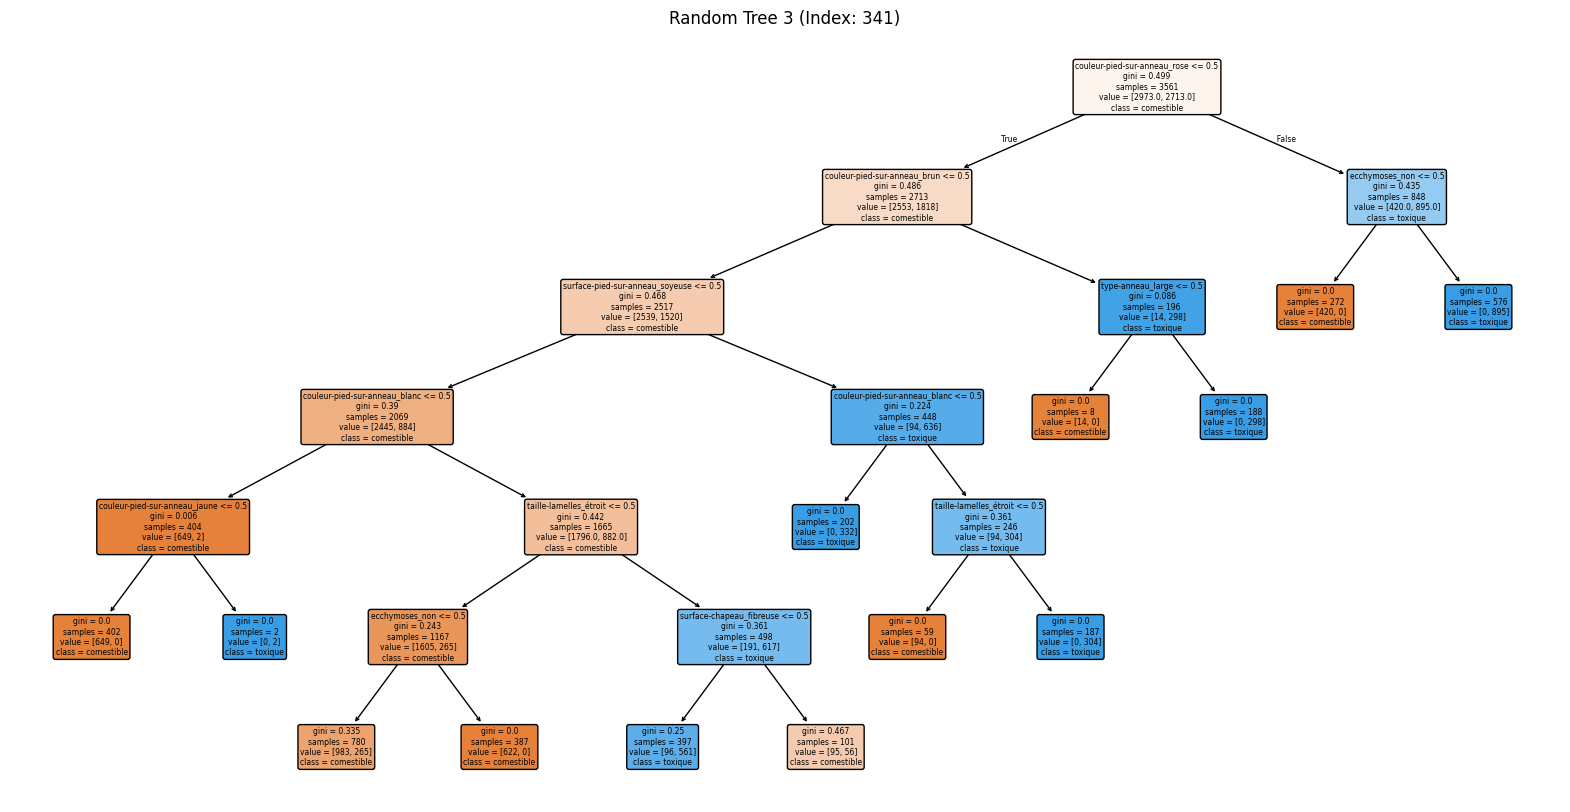

In [23]:
from random import randint
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Select 3 random trees from the forest
random_indices = [randint(0, len(random_forest.estimators_) - 1) for _ in range(3)]

# Plot the selected trees
for i, index in enumerate(random_indices):
    plt.figure(figsize=(20,10))
    plot_tree(random_forest.estimators_[index],
              feature_names=X_train.columns,
              class_names=['comestible', 'toxique'],
              filled=True, rounded=True)
    plt.title(f"Random Tree {i+1} (Index: {index})")
    plt.show()

3.3 Mesurer la précision du modèle Random Forest sur les données de dev

In [24]:
from sklearn.metrics import accuracy_score

# prediction avec les datas dev
y_pred_rf = random_forest.predict(X_dev)

# Calculate avec accuracy
accuracy_rf = accuracy_score(y_dev, y_pred_rf)

print(f"Précision du modèle Random Forest sur les données de dev : {accuracy_rf:.4f}")

Précision du modèle Random Forest sur les données de dev : 0.9676


## 4. optimisation des paramètres

4.1 En utilisant GridSearchCV, chercher la meilleure combinaison max_depth et n_estimator.

Afficher les paramètre du modèle et a précision obtenue.

Réexécuter un apprentissage avec la meilleure combinaison.


In [ ]:
from sklearn.model_selection import GridSearchCV


4.2 Afficher les paramètres optimaux et la précisions obtenue sur les données dev

4.3 Classer et Afficher les caractéristiques d'importance supérieure à 1%

## 5. Stacking

Essayer différents modèles d'estimateur final

In [28]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Define base models (estimators)
estimators = [
    ('dt', DecisionTreeClassifier(random_state=42)),
    ('rf', RandomForestClassifier(n_estimators=500, max_depth=6, random_state=42))
]

# Define different final estimators to experiment with
final_estimators = {
    'Logistic Regression': LogisticRegression(),
    'Naive Bayes': GaussianNB(),
    'Perceptron': Perceptron(random_state=42)
}

# Create and evaluate StackingClassifiers with different final estimators
for name, final_estimator in final_estimators.items():
    print(f"Testing StackingClassifier with {name} as final estimator:")

    # Create the stacking classifier
    stacking_clf = StackingClassifier(
        estimators=estimators,
        final_estimator=final_estimator,
        cv=5  # Use cross-validation for stacking
    )

    # Train the stacking classifier
    stacking_clf.fit(X_train, y_train)

    # Evaluate the stacking classifier on the development data
    accuracy = stacking_clf.score(X_dev, y_dev)

    print(f"Accuracy on development data: {accuracy:.4f}\n")

Testing StackingClassifier with Logistic Regression as final estimator:
Accuracy on development data: 0.9922

Testing StackingClassifier with Naive Bayes as final estimator:
Accuracy on development data: 0.9922

Testing StackingClassifier with Perceptron as final estimator:
Accuracy on development data: 0.9922



## 6. Gradient Boosting

6. Exécuter un apprentissage de Gradient Boosting avec et sans "Early Stopping" sur le nombre d'estimateurs. Comparer avec le résultat sur les données dev.

Training Gradient Boosting without Early Stopping...
Accuracy of Gradient Boosting without Early Stopping on dev data: 0.9467

Training Gradient Boosting with Early Stopping...


TypeError: BaseGradientBoosting.fit() got an unexpected keyword argument 'eval_set'

## 7. (Optionnel) Recommencer les exercices précédents en utilisant les "ordinal encoders". Que remarquez-vous ?